# Problem statement

### Test independence of two categorical variables Education and DeathPenalty

# Permutation Test for Independence

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('data/GSS2002.csv')

In [3]:
df = df_raw[['Education','DeathPenalty']].dropna().reset_index(drop=True)  #drop the rows where at least one element is missing.

In [4]:
df.head()

,Education,DeathPenalty
0,HS,Favor
1,Bachelors,Favor
2,HS,Favor
3,HS,Favor
4,HS,Favor


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Education     1307 non-null   object
 1   DeathPenalty  1307 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [5]:
np.sort(df['Education'].unique()).tolist()

['Bachelors', 'Graduate', 'HS', 'Jr Col', 'Left HS']

In [6]:
df['DeathPenalty'].unique().tolist()

['Favor', 'Oppose']

## Observed test statistic

In [ ]:
#cross tabulation calculates the contingency table which represents the counts for each combination of categories

In [7]:
df_crosstab = pd.crosstab(df['Education'],df['DeathPenalty'])  #cross tabulation of two categorical variables

In [13]:
df_crosstab['rowsum'] = df_crosstab.sum(axis=1)

In [16]:
df2 = pd.DataFrame(df_crosstab.sum(axis=0).values.reshape(1,-1), columns=list(df_crosstab), index=['colsum'])

In [18]:
df_crosstab_ext = pd.concat([df_crosstab, df2], axis = 0)

In [19]:
df_crosstab_ext

,Favor,Oppose,rowsum
Bachelors,135,71,206
Graduate,64,50,114
HS,511,200,711
Jr Col,71,16,87
Left HS,117,72,189
colsum,898,409,1307


In [21]:
df_crosstab = pd.crosstab(df['Education'],df['DeathPenalty'])

In [22]:
colsum = df_crosstab.sum(axis=0); colsum

DeathPenalty
Favor     898
Oppose    409
dtype: int64

In [23]:
rowsum = df_crosstab.sum(axis=1); rowsum

Education
Bachelors    206
Graduate     114
HS           711
Jr Col        87
Left HS      189
dtype: int64

In [24]:
df_crosstab

DeathPenalty,Favor,Oppose
Education,,
Bachelors,135,71
Graduate,64,50
HS,511,200
Jr Col,71,16
Left HS,117,72


In [25]:
def chisq(obs):
    observed = obs.values
    rowsum = obs.sum(axis=1)
    colsum = obs.sum(axis=0)
    expected = np.outer(rowsum,colsum)/observed.sum()    
    return ((observed - expected)**2/expected).sum()

In [26]:
observed = chisq(df_crosstab); observed  ##calculate cross tabulation of observation

23.450927461370544

## Calculate permutation distribution

In [27]:
edu = df['Education']  #fixed column

In [33]:
N = 10**3-1
result = np.zeros(N)
for i in range(N):
    death_penalty_permuted = df['DeathPenalty'].sample(frac=1.0).reset_index(drop=True)  #caution: reset_index must be called
    table = pd.crosstab(edu, death_penalty_permuted)  #calculate cross tabulation of fixed and row-sampled column
    result[i] = chisq(table)

## Distribution of test statistic (chi-squared)

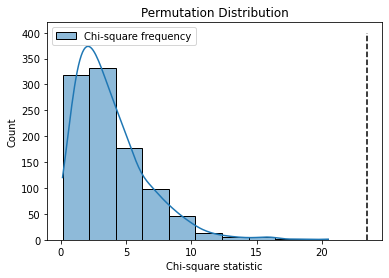

In [35]:
plt.figure(figsize = (6, 4), dpi=72)  #default dpi=100
ax = sns.histplot(pd.DataFrame(result), bins=10, kde=True, label='Chi-square frequency')
plt.plot([observed, observed], [0, 400], "k--")
ax.set(xlabel='Chi-square statistic')
plt.legend(loc='best')
plt.title('Permutation Distribution')
plt.show()

## Hypothesis testing

In [36]:
p_value = (sum(result >= observed)+1)/(N+1); p_value  #p_value = probability of exceeding observed test statistic

0.001

In [37]:
#if p_value < significance level (1%) then accept alternative hypothesis (H_A)
alpha = 0.01  #set significance level
H_A = p_value < alpha  #test alternative hypothesis

In [38]:
H_A  #alternative hypothesis is accepted with significance level of 1%.

True

## Chi-squared reference distribution

In [ ]:
#cdf = cumulative distribution function = P(Z<=observed_value)

In [ ]:
#df = degree of freedom; df=(I-1)*(J-1) where I and J are the number of rows and columns of the contingency table

In [42]:
1-chi2.cdf(23.45, 4)  #equivalent to p-value = 1-P(Z<=observed_value) = 1-P(Z<=23.45);  df=(I-1)*(J-1)=4 with I=5, J=2

0.00010293308535880286